In [5]:
import shutil
import os

source_dir = '/kaggle/input/w02-regression-with-multiple-input-variables/w02-regression-with-multiple-input-variables' 

destination_dir = '/kaggle/working'

# Copy toàn bộ ra thư mục làm việc
if os.path.exists(source_dir):
    !cp -r {source_dir}/* {destination_dir}
    !ls
    print("Setup thành công!")
else:
    print("Sai đường dẫn source_dir rồi, kiểm tra lại nhé!")

data		       lab_utils_multi.py
deeplearning.mplstyle  w02-regression-with-multiple-input-variables
lab_utils_common.py
Setup thành công!


In [7]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [8]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [10]:
print(f"X Shape: {X_train.shape}, X type: {type(X_train)}")
print(X_train)
print(f"y Shape: {y_train.shape}, y type: {type(y_train)}")
print(y_train)

X Shape: (3, 4), X type: <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y type: <class 'numpy.ndarray'>
[460 232 178]


In [11]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [14]:
def predict_single_loop(x, w, b):
    n = x.shape[0]
    p = 0
    for i in range(n):
        p += x[i] * w[i]
    p += b
    return p

In [15]:
x_vec = X_train[0,:]
print(f"x_vec shape: {x_vec.shape}, x_vec value: {x_vec}")

f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape: {f_wb.shape}, f_wb = {f_wb}")

x_vec shape: (4,), x_vec value: [2104    5    1   45]
f_wb shape: (), f_wb = 459.9999976194083


In [16]:
def predict(x, w, b):
    return np.dot(x, w) + b

In [17]:
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


In [18]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        cost += (f_wb - y[i])**2
    cost /= 2 * m
    return cost

In [19]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


In [20]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(n, )
    dj_db = 0.

    for i in range(m):
        err = np.dot(X[i], w) + b - y[i]
        for j in range(n):
            dj_dw[j] += err *  X[i, j]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [21]:
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [27]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_init)
    b = b_init

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        J_history.append(compute_cost(X, y, w, b))
        
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history

In [32]:
init_w = np.zeros_like(w_init)
init_b = 0.

iterations = 1000000
alpha = 5.0e-7

w_final, b_final, J_history = gradient_descent(X_train, y_train, init_w, init_b, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration 100000: Cost   563.25   
Iteration 200000: Cost   550.05   
Iteration 300000: Cost   537.17   
Iteration 400000: Cost   524.59   
Iteration 500000: Cost   512.31   
Iteration 600000: Cost   500.31   
Iteration 700000: Cost   488.60   
Iteration 800000: Cost   477.16   
Iteration 900000: Cost   465.99   
b,w found by gradient descent: 0.09,[ 0.23  2.63 -7.41 -1.25] 
prediction: 441.53, target value: 460
prediction: 274.24, target value: 232
prediction: 153.41, target value: 178


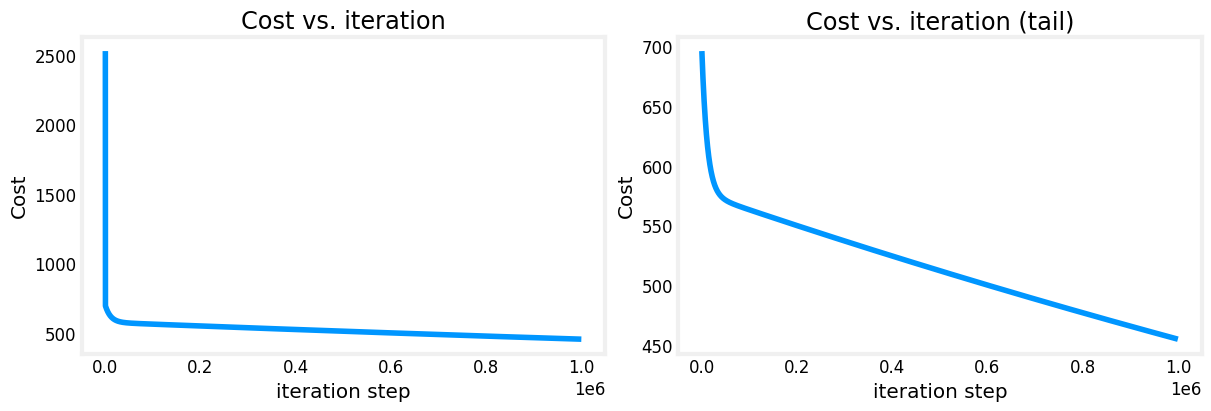

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()